In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import matplotlib.lines as mlines
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# define path
path = '/Users/laurituominen/Documents/Research/Reettis/neuromaps/'

# get data for plotting 
corrs_turku = dict(np.load(path + 'data/corrs_turku.npz'))
nulls_turku = dict(np.load(path + 'data/nulls_turku.npz'))

corrs_enigma= dict(np.load(path + 'data/corrs_enigma.npz'))
nulls_enigma = dict(np.load(path + 'data/nulls_enigma.npz'))


In [4]:
corrs_turku

{'ding2010_mrb': array([-0.07990853,  0.49235076]),
 'dubois2015_abp688': array([0.11861066, 0.32836716]),
 'dukart2018_flumazenil': array([0.10191187, 0.39716028]),
 'dukart2018_fpcit': array([-0.41688382,  0.00079992]),
 'fazio2016_madam': array([-0.34088637,  0.00409959]),
 'finnema2016_ucbj': array([0.3007559 , 0.00949905]),
 'gallezot2010_p943': array([0.17632036, 0.1389861 ]),
 'gallezot2017_gsk189254': array([0.07465883, 0.55064494]),
 'hcps1200_megalpha': array([-0.39369936,  0.00169983]),
 'hcps1200_megbeta': array([0.21379663, 0.08429157]),
 'hcps1200_megdelta': array([0.28439368, 0.01429857]),
 'hcps1200_meggamma1': array([0.42307486, 0.00059994]),
 'hcps1200_meggamma2': array([0.25983323, 0.02129787]),
 'hcps1200_megtheta': array([0.37691905, 0.0049995 ]),
 'hcps1200_megtimescale': array([0.30076309, 0.00859914]),
 'hcps1200_myelinmap': array([-0.34840136,  0.00389961]),
 'hcps1200_thickness': array([0.09457915, 0.4229577 ]),
 'hillmer2016_flubatine': array([0.36628654, 0.0

In [5]:
change_x_labels = np.load(path + '/data/rename_xlabels.npy', allow_pickle='TRUE').item()
change_x_labels['beliveau2017_dasb'] = '5-HTT'



In [6]:
change_x_labels

{'jaworska2020_fallypride': 'D2',
 'kaller2017_sch23390': 'D1',
 'radnakrishnan2018_gsk215083': '5-HT6',
 'beliveau2017_cimbi36': '5-HT2A',
 'savli2012_way100635': '5-HT1A',
 'beliveau2017_az10419369': '5-HT1B',
 'beliveau2017_sb207145': '5-HT4',
 'fazio2016_madam': '5-HTT',
 'tuominen_feobv': 'vAChT',
 'hillmer2016_flubatine': '$\\alpha4 \\beta2*$',
 'naganawa2020_lsn3172176': 'M1',
 'margulies2016_fcgradient01': 'Functional Gradient',
 'mueller2013_intersubjvar': 'Intersubject Variance',
 'hcps1200_megalpha': 'Alpha Power',
 'hcps1200_megdelta': 'Delta Power',
 'hcps1200_megbeta': 'Beta Power',
 'hcps1200_meggamma1': 'Low Gamma Power',
 'hcps1200_meggamma2': 'High Gamma Power',
 'hcps1200_megtheta': 'Theta Power',
 'hcps1200_megtimescale': 'Intrinsic Timescale',
 'finnema2016_ucbj': 'Synaptic Vesicles',
 'hcps1200_thickness': 'Cortical Thickness',
 'hcps1200_myelinmap': 'T1/T2',
 'dukart2018_flumazenil': '$GABA_A$',
 'dubois2015_abp688': 'mGluR5',
 'laurikainen2018_fmpepd2': 'Cannabi

In [7]:
subgroups = {'dopamine': ( 'kaller2017_sch23390','jaworska2020_fallypride'),  
             'serotonin': ('beliveau2017_dasb', 'savli2012_way100635','beliveau2017_az10419369', 
                           'beliveau2017_cimbi36', 'beliveau2017_sb207145', 'radnakrishnan2018_gsk215083'), 
            'acetylcholine': ('tuominen_feobv', 'hillmer2016_flubatine', 'naganawa2020_lsn3172176'),
            'function': ('margulies2016_fcgradient01', 'mueller2013_intersubjvar'),
             'neurophysiology': ('hcps1200_megalpha','hcps1200_megbeta', 'hcps1200_megdelta', 
                            'hcps1200_meggamma1', 'hcps1200_meggamma2',
                            'hcps1200_megtheta', 'hcps1200_megtimescale'),
             'structural': ('finnema2016_ucbj', 'hcps1200_thickness', 'hcps1200_myelinmap'),
             'various': ('dukart2018_flumazenil', 'dubois2015_abp688',
                         'laurikainen2018_fmpepd2', 'kantonen2020_carfentanil',
                        'gallezot2017_gsk189254'),
             'metabolic' : ('raichle_cbf', 'raichle_cbv', 'raichle_cmr02', 'raichle_cmruglu')
            }

        rho     pspin tracers  fdr_corrected_p_value
0 -0.136113  0.252275      D1               0.504550
1 -0.151458  0.164884      D2               0.329767
        rho     pspin tracers  fdr_corrected_p_value
0 -0.404191  0.001800   5-HTT               0.010799
1 -0.223089  0.067293  5-HT1A               0.403760
2  0.198970  0.109589  5-HT1B               0.657534
3  0.377866  0.001200  5-HT2A               0.007199
4  0.275148  0.018998   5-HT4               0.113989
5  0.064869  0.593041   5-HT6               1.000000
        rho     pspin            tracers  fdr_corrected_p_value
0 -0.321012  0.006299              vAChT               0.018898
1  0.366287  0.004900  $\alpha4 \beta2*$               0.014699
2  0.189150  0.094891                 M1               0.284672
        rho     pspin        tracers  fdr_corrected_p_value
0  0.101912  0.397160       $GABA_A$               1.000000
1  0.118611  0.328367         mGluR5               1.000000
2  0.455850  0.001000  Cannabinoid

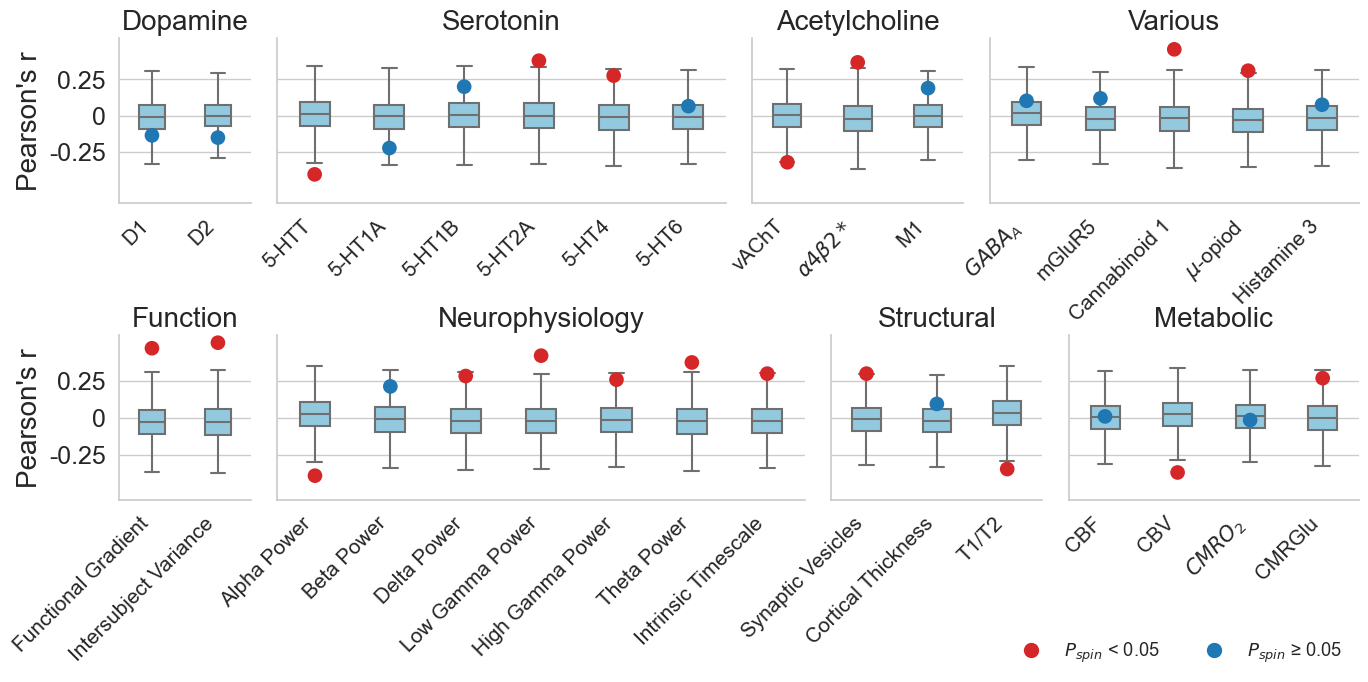

In [18]:
plot_order = ["dopamine", "serotonin", "acetylcholine", "various", "function", "neurophysiology", 
              "structural", "metabolic"]

fig = plt.figure(figsize=(16,6))
gs = fig.add_gridspec(2, 16, hspace=0.8, wspace=0.5)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

f_ax1 = fig.add_subplot(gs[0, 0:2])
f_ax2 = fig.add_subplot(gs[0, 2:8], sharey=f_ax1)
f_ax3 = fig.add_subplot(gs[0, 8:11], sharey=f_ax1)
f_ax4 = fig.add_subplot(gs[0, 11:], sharey=f_ax1)
f_ax5 = fig.add_subplot(gs[1, 0:2])
f_ax6 = fig.add_subplot(gs[1, 2:9], sharey=f_ax5)
f_ax7 = fig.add_subplot(gs[1, 9:12], sharey=f_ax5)
f_ax7 = fig.add_subplot(gs[1, 12:], sharey=f_ax5)

sns.set(font_scale=1.2)

for i,ax in enumerate(fig.get_axes()):
    df_nulls = pd.DataFrame(np.column_stack([nulls_turku.get(key) for key in subgroups[plot_order[i]]]))
    df_nulls.columns = subgroups[plot_order[i]]
    df_corrs = pd.DataFrame([corrs_turku.get(key) for key in subgroups[plot_order[i]]])
    xlabel = [change_x_labels[key] for key in df_nulls.columns]
    #xlabel = [colname[1] for colname in [colname.split('_') for colname in df_nulls.columns]]
    df_corrs.columns = ['rho', 'pspin']
    df_corrs['tracers'] = xlabel
    _, fdr_corrected_pvalues, _, _ = multipletests(df_corrs['pspin'], alpha=0.05, method='bonferroni')
    df_corrs['fdr_corrected_p_value'] = fdr_corrected_pvalues
    print(df_corrs)
    
    color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
    color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
    x = np.arange(df_corrs.shape[0])
    cpalette = dict(zip(x, color))
    sns.set_style("whitegrid")

    ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='skyblue', ax=ax);
    ax2 = sns.pointplot(x=x,
                  y=df_corrs['rho'],
                  palette=cpalette,
                  join = False , 
                  scale=1.2,
                  ax=ax1);

    children1 = ax1.get_children()
    children2 = ax2.get_children()

    # Set the zorder of the children of the boxplot to 1
    for child in children1:
        child.set_zorder(10)

    # Set the zorder of the children of the pointplot to 2
    for child in children2:
        child.set_zorder(20)

    ax1.set_axisbelow(True)
    
    ax1.set_title(plot_order[i].capitalize(), fontsize=20)
    if i in [0,4]:
        ax1.set(yticks=[-.25, 0, .25])
        ax1.set_yticklabels([ '-0.25', '0', '0.25'], fontsize=30)
        ax1.set_ylabel("Pearson's r", fontsize=20)
        ax1.tick_params(axis='y', labelsize=18)
    else:
        ax1.tick_params(axis='y', which='both', length=0, labelleft=False)
        ax1.set_ylabel(None)
        ax1.spines['left'].set_visible(True)
        
    ax1.set_xticklabels(xlabel, rotation=45, ha="right", fontsize=15)

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2)

plt.savefig(path + 'figures/Figure3.jpg', bbox_inches="tight", dpi=300) 

In [19]:
display(df_corrs)

,rho,pspin,tracers,fdr_corrected_p_value
0,0.009795,0.934207,CBF,1.000000
1,-0.371877,0.001200,CBV,0.004800
2,-0.014991,0.903210,$CMRO_2$,1.000000
3,0.269998,0.022898,CMRGlu,0.091591


        rho     pspin               tracers  fdr_corrected_p_value
0 -0.000058  0.999600           D2 (flb457)               0.999600
1 -0.340886  0.004100         5-HTT (madam)               0.015298
2  0.036385  0.738126   5-HT2A (altanserin)               0.950665
3 -0.031009  0.792221      5-HT1A (cumi101)               0.950665
4  0.176320  0.138986         5-HT1B (p943)               0.277972
5  0.344504  0.005099  Cannabinoid 1 (omar)               0.015298


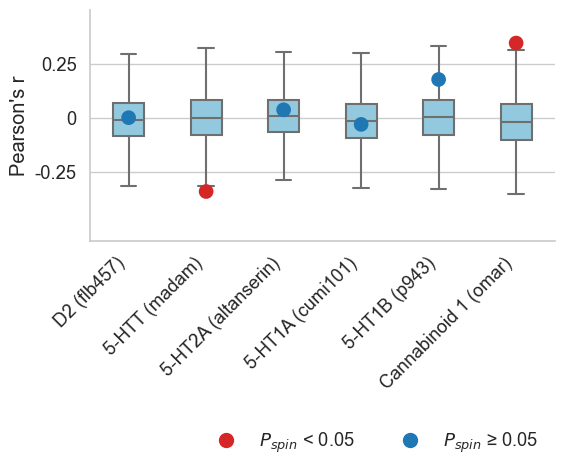

In [15]:
alternatives = ['sandiego2015_flb457','fazio2016_madam','savli2012_altanserin',
                'beliveau2017_cumi101', 'savli2012_p943','normandin2015_omar']


df_nulls = pd.DataFrame(np.column_stack([nulls_turku.get(key) for key in alternatives]))
df_nulls.columns = alternatives

df_corrs = pd.DataFrame([corrs_turku.get(key) for key in alternatives])
tracer_names = [colname[1] for colname in [colname.split('_') for colname in df_nulls.columns]]
target_names = ['D2', '5-HTT', '5-HT2A', '5-HT1A', '5-HT1B', 'Cannabinoid 1']
xlabel = []
for item1, item2 in zip(target_names, tracer_names):
    xlabel.append(item1 + " (" + item2 + ")")


df_corrs.columns = ['rho', 'pspin']
df_corrs['tracers'] = xlabel

print(df_corrs)

color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
x = np.arange(df_corrs.shape[0])
cpalette = dict(zip(x, color))
    
fig = plt.figure(figsize=(6,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

ax1 =sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='skyblue')
ax2 = sns.pointplot(x=x,
              y=df_corrs["rho"],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);

children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25], ylabel="Pearson's r")
ax1.set_yticklabels(['-0.25', '0', '0.25'])
ax1.set_xticklabels(xlabel, rotation=45, ha="right")


blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
plt.legend(handles=[blue_circle, red_circle], frameon=False, bbox_to_anchor=(1, -0.75), ncol=2)

plt.savefig(path + 'figures/Supp_Fig2.jpg', bbox_inches="tight", dpi=300) 

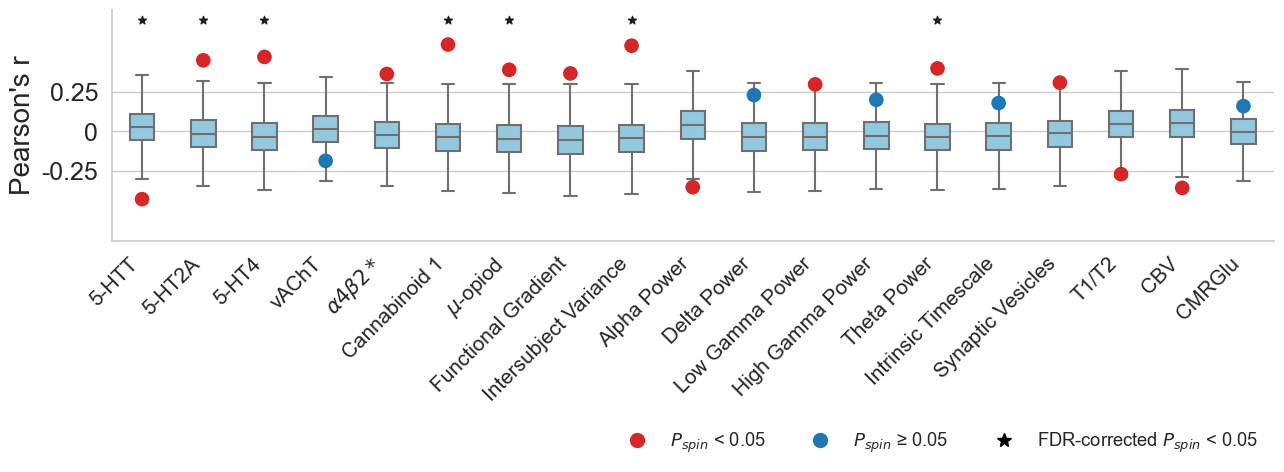

In [14]:
replicate  = ['beliveau2017_dasb','beliveau2017_cimbi36', 'beliveau2017_sb207145', 'tuominen_feobv', 'hillmer2016_flubatine',
              'laurikainen2018_fmpepd2', 'kantonen2020_carfentanil', 'margulies2016_fcgradient01','mueller2013_intersubjvar',  'hcps1200_megalpha', 'hcps1200_megdelta', 
              'hcps1200_meggamma1', 'hcps1200_meggamma2','hcps1200_megtheta', 'hcps1200_megtimescale', 'finnema2016_ucbj', 'hcps1200_myelinmap','raichle_cbv', 
              'raichle_cmruglu']

df_nulls = pd.DataFrame(np.column_stack([nulls_enigma.get(key) for key in replicate]))
df_nulls.columns = replicate

df_corrs = pd.DataFrame([corrs_enigma.get(key) for key in replicate])
xlabel = [change_x_labels[key] for key in df_nulls.columns]

df_corrs.columns = ['rho', 'pspin']
df_corrs['tracers'] = xlabel
_, fdr_corrected_pvalues, _, _ = multipletests(df_corrs['pspin'], alpha=0.05, method='bonferroni')

# add the FDR corrected p-values as a new column to the dataframe
df_corrs['fdr_corrected_p_value'] = fdr_corrected_pvalues
color = ((df_corrs['pspin'] > 0.05).astype(int)).tolist()
color = [(0.839, 0.152, 0.156) if x == 0 else (0.121, 0.466, 0.705) for x in color]
x = np.arange(df_corrs.shape[0])
cpalette = dict(zip(x, color))
    
fig = plt.figure(figsize=(15,3))
sns.set_style("whitegrid")

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False


ax1 = sns.boxplot(data=df_nulls, width=0.4, fliersize=0, color ='skyblue')
ax2 = sns.pointplot(x=x,
              y=df_corrs['rho'],
              palette=cpalette,
              join = False , 
              scale=1.2,
              ax=ax1);

children1 = ax1.get_children()
children2 = ax2.get_children()

# Set the zorder of the children of the boxplot to 1
for child in children1:
    child.set_zorder(10)

# Set the zorder of the children of the pointplot to 2
for child in children2:
    child.set_zorder(20)

ax1.set_axisbelow(True)

ax1.set(yticks=[-.25, 0, .25])

ax1.set_yticklabels(['-0.25', '0', '0.25'])
ax1.set_xticklabels(xlabel, rotation=45, ha="right", fontsize=15)
ax1.set_ylabel("Pearson's r", fontsize=20)
ax1.tick_params(axis='y', labelsize=18)


# annotate those that survive FDR correction 
xstars = np.where(df_corrs['fdr_corrected_p_value'] < 0.05)[0]
ystars = np.ones(len(xstars)) * 0.7
ax = sns.regplot(x=xstars, y=ystars, fit_reg=False, marker="*", color="black")

blue_circle = mlines.Line2D([], [], color=(0.839, 0.152, 0.156), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ < 0.05')
red_circle = mlines.Line2D([], [], color=(0.121, 0.466, 0.705), marker='o', linestyle='None',
                          markersize=10, label='$P_{spin}$ ≥ 0.05' )
black_star = mlines.Line2D([], [], color='black', marker='*', linestyle='None',
                          markersize=10, label='FDR-corrected $P_{spin}$ < 0.05' )
plt.legend(handles=[blue_circle, red_circle, black_star], frameon=False, bbox_to_anchor=(1, -0.75), ncol=3)

plt.savefig(path + 'figures/Figure4.jpg', bbox_inches="tight", dpi=300) 

In [13]:
df_corrs

,rho,pspin,tracers,fdr_corrected_p_value
0,-0.427301,0.000400,5-HTT,0.003800
1,0.447239,0.000300,5-HT2A,0.003800
2,0.468571,0.001100,5-HT4,0.004560
3,-0.186156,0.121388,vAChT,0.138016
4,0.361201,0.002900,$\alpha4 \beta2*$,0.006887
5,0.546847,0.000600,Cannabinoid 1,0.003800
6,0.387682,0.002600,$\mu$-opiod,0.006887
7,0.364822,0.006199,Functional Gradient,0.011779
8,0.539416,0.001200,Intersubject Variance,0.004560
9,-0.352202,0.005399,Alpha Power,0.011399
